### Author
- Liam Upstone-Smith
- 21017958

### Research Question
...

In [ ]:
# possible ideas:
# Classificaiton to determine if they're a smoker, based on [BMI, Age, Charges, sex, children]
# regression predict BMI, based on [Age, Charges, Sex, children, Smoker]

### Packages

In [27]:
# Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns

### load in data

In [28]:
# Load in Insurance data as panda Dataframe
df = pd.read_csv("insurance-adapted.csv")

### Data Preprocessing

The number of rows and columns (1338, 7)
age         20
sex          0
bmi          0
children     0
smoker       0
region       0
charges      0
dtype: int64


<Axes: >

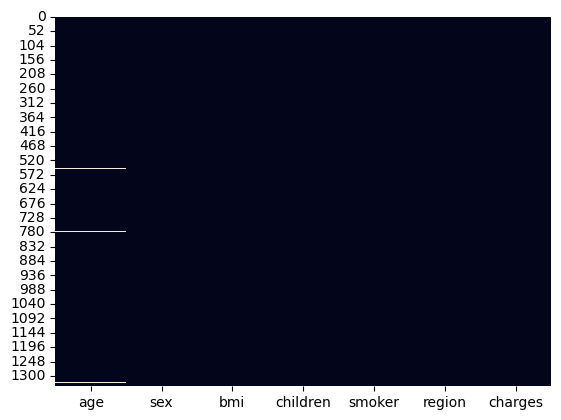

In [31]:
print("The number of rows and columns", df.shape)

# Checking if there are any empty values
print(df.isnull().sum())

# Creates heatmap of missing values
sns.heatmap(df.isnull(), cbar=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


<Axes: >

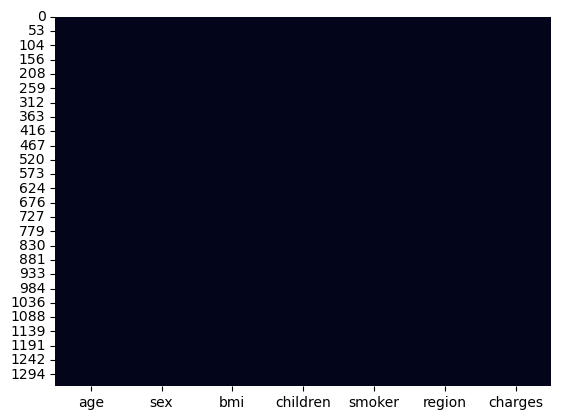

In [35]:
# Dropping the rows with missing values 
df = df.dropna()

# Checking if there are any empty values
print(df.isnull().sum())

# Creates heatmap of values to show no missing values
sns.heatmap(df.isnull(), cbar=False)

# K Nearest Neighbour
###### Using BMI and insurance charges data.

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encode categorical variables
label_encoder_sex = LabelEncoder()
df['sex'] = label_encoder_sex.fit_transform(df['sex'])  # 0 for female, 1 for male

label_encoder_smoker = LabelEncoder()
df['smoker'] = label_encoder_smoker.fit_transform(df['smoker'])  # 0 for no, 1 for yes


# Define features (X) and target (y)
X = df[['age', 'sex', 'bmi', 'charges']]
y = df['smoker']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can tune the number of neighbors
knn.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9848484848484849
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       207
           1       0.95      0.98      0.97        57

    accuracy                           0.98       264
   macro avg       0.97      0.98      0.98       264
weighted avg       0.99      0.98      0.98       264



#### Exploring the number of neighbors used

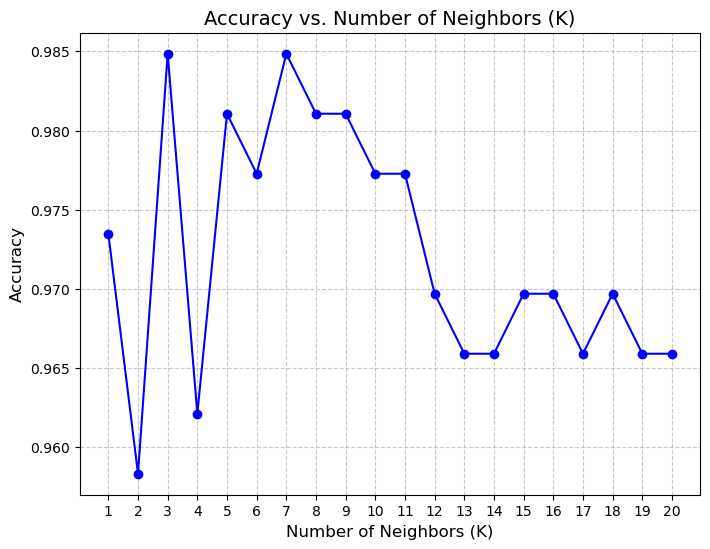

In [61]:
# Vary the number of neighbors
neighbors = range(1, 21)
accuracies = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(neighbors, accuracies, marker='o', linestyle='-', color='blue')
plt.title('Accuracy vs. Number of Neighbors (K)', fontsize=14)
plt.xlabel('Number of Neighbors (K)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(neighbors)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

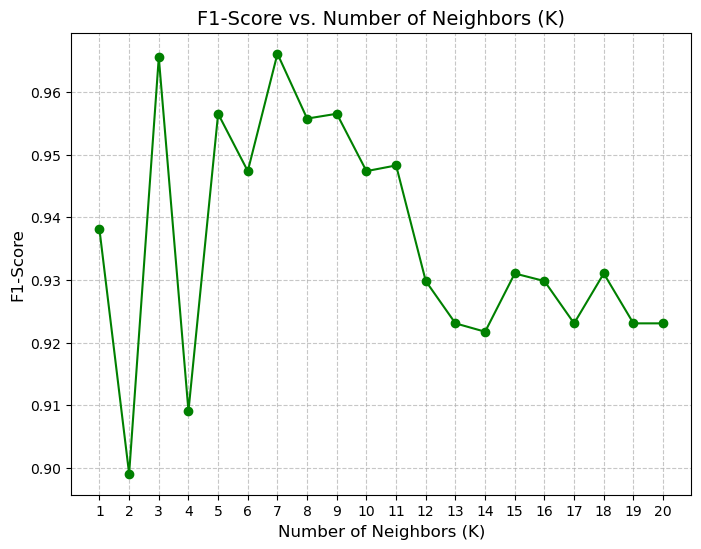

In [63]:
from sklearn.metrics import f1_score

# Vary the number of neighbors
neighbors = range(1, 21)
f1_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    f1_scores.append(f1_score(y_test, y_pred))

# Plot the F1-score
plt.figure(figsize=(8, 6))
plt.plot(neighbors, f1_scores, marker='o', linestyle='-', color='green')
plt.title('F1-Score vs. Number of Neighbors (K)', fontsize=14)
plt.xlabel('Number of Neighbors (K)', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.xticks(neighbors)
plt.grid(linestyle='--', alpha=0.7)
plt.show()